In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv

--2024-07-14 17:04:09--  https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19712 (19K) [text/plain]
Saving to: ‘placementData.csv.1’

placementData.csv.1 100%[===================>]  19.25K  --.-KB/s    in 0s      

2024-07-14 17:04:09 (42.1 MB/s) - ‘placementData.csv.1’ saved [19712/19712]



In [3]:
df = pd.read_csv("placementData.csv")
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## EDA

In [6]:
df.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [7]:
df['target'] = df['status'].apply(lambda x: 1 if x=='Placed' else 0)

In [8]:
categorical = ['gender', 'ssc_b','hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation']

In [9]:
for cat in categorical:
    print(df[cat].value_counts())
    print('\n')

gender
M    139
F     76
Name: count, dtype: int64


ssc_b
Central    116
Others      99
Name: count, dtype: int64


hsc_b
Others     131
Central     84
Name: count, dtype: int64


hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64


degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64


workex
No     141
Yes     74
Name: count, dtype: int64


specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64




In [10]:
for var in categorical:
    print(pd.crosstab(df['target'], df[var], margins=False))
    print('\n')

gender   F    M
target         
0       28   39
1       48  100


ssc_b   Central  Others
target                 
0            38      29
1            78      70


hsc_b   Central  Others
target                 
0            27      40
1            57      91


hsc_s   Arts  Commerce  Science
target                         
0          5        34       28
1          6        79       63


degree_t  Comm&Mgmt  Others  Sci&Tech
target                               
0                43       6        18
1               102       5        41


workex  No  Yes
target         
0       57   10
1       84   64


specialisation  Mkt&Fin  Mkt&HR
target                         
0                    25      42
1                    95      53




In [11]:
continuous = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

In [12]:
summary_cols = ['count','mean','std','min','1%', '10%', '20%','30%','40%','50%','60%','70%','80%','90%','99%','max']
summary = pd.DataFrame()
for column in continuous:
    row = pd.DataFrame(data = df[column].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])).transpose()
    summary = pd.concat([summary, row], axis=0)

In [13]:
summary

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
ssc_p,215.0,67.303395,10.827205,40.89,43.1400,52.000,58.000,62.000,64.000,67.0,70.00,74.000,77.000,82.000,87.0000,89.40
hsc_p,215.0,66.333163,10.897509,37.00,40.2800,52.000,60.000,62.000,63.000,65.0,67.52,71.480,74.728,79.000,91.8600,97.70
degree_p,215.0,66.370186,7.358743,50.00,50.9680,57.000,60.000,64.000,65.000,66.0,67.44,69.580,72.134,77.120,83.8600,91.00
etest_p,215.0,72.100558,13.275956,50.00,50.0672,55.802,59.000,62.000,67.000,71.0,75.00,80.000,86.000,92.000,97.0000,98.00
mba_p,215.0,62.278186,5.833385,51.21,51.4682,54.986,57.012,58.782,60.402,62.0,63.02,65.474,67.144,70.678,76.1142,77.89


Text(0.5, 1.0, 'ssc_p by target')

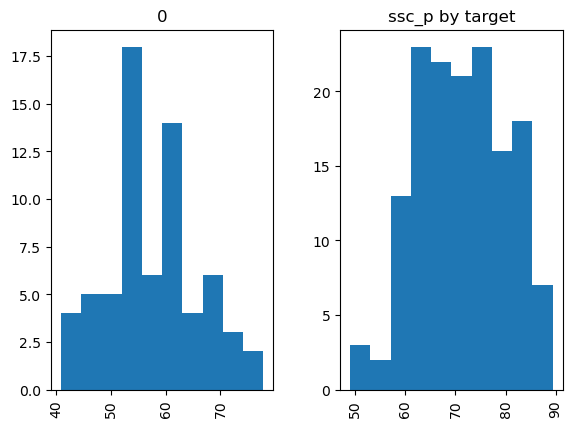

In [14]:
df.hist('ssc_p', by='target')
plt.title(f'ssc_p by target')

Text(0.5, 1.0, 'hsc_p by target')

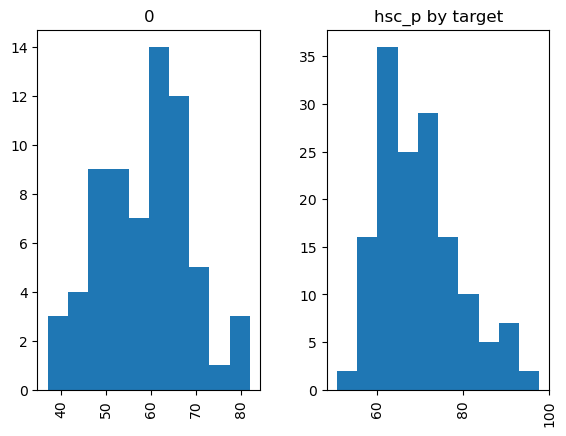

In [15]:
df.hist('hsc_p', by='target')
plt.title(f'hsc_p by target')

Text(0.5, 1.0, 'degree_p by target')

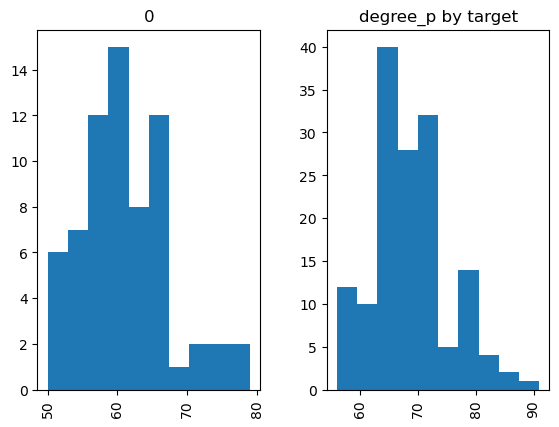

In [16]:
df.hist('degree_p', by='target')
plt.title(f'degree_p by target')

Text(0.5, 1.0, 'etest_p by target')

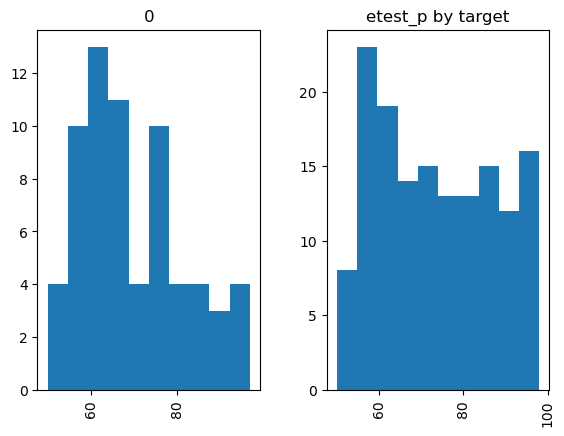

In [17]:
df.hist('etest_p', by='target')
plt.title(f'etest_p by target')

Text(0.5, 1.0, 'mba_p by target')

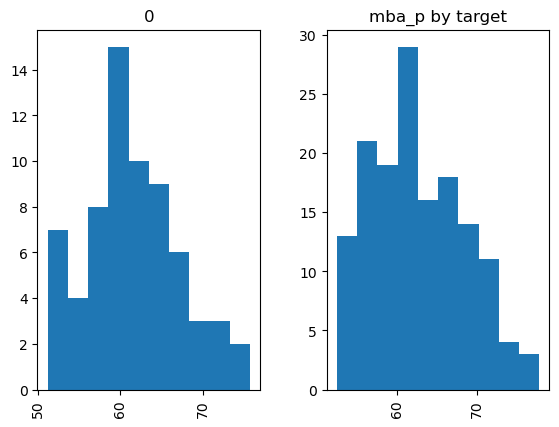

In [18]:
df.hist('mba_p', by='target')
plt.title(f'mba_p by target')

Text(0.5, 1.0, 'salary by target')

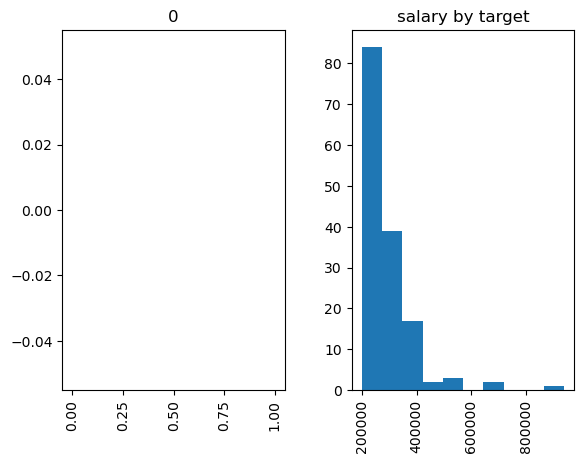

In [19]:
df.hist('salary', by='target')
plt.title(f'salary by target')

## Importance

In [21]:
df[continuous+['target']].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,target
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.607889
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.491228
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.479861
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.127639
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.076922
target,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000


In [22]:
df_cat = pd.get_dummies(df[categorical], prefix=categorical)

In [23]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender_F                215 non-null    bool 
 1   gender_M                215 non-null    bool 
 2   ssc_b_Central           215 non-null    bool 
 3   ssc_b_Others            215 non-null    bool 
 4   hsc_b_Central           215 non-null    bool 
 5   hsc_b_Others            215 non-null    bool 
 6   hsc_s_Arts              215 non-null    bool 
 7   hsc_s_Commerce          215 non-null    bool 
 8   hsc_s_Science           215 non-null    bool 
 9   degree_t_Comm&Mgmt      215 non-null    bool 
 10  degree_t_Others         215 non-null    bool 
 11  degree_t_Sci&Tech       215 non-null    bool 
 12  workex_No               215 non-null    bool 
 13  workex_Yes              215 non-null    bool 
 14  specialisation_Mkt&Fin  215 non-null    bool 
 15  specialisation_Mkt&HR  

In [24]:
df_converted = pd.concat([df[['target']+continuous], df_cat], axis=1)

In [55]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  215 non-null    int64  
 1   ssc_p                   215 non-null    float64
 2   hsc_p                   215 non-null    float64
 3   degree_p                215 non-null    float64
 4   etest_p                 215 non-null    float64
 5   mba_p                   215 non-null    float64
 6   gender_F                215 non-null    bool   
 7   gender_M                215 non-null    bool   
 8   ssc_b_Central           215 non-null    bool   
 9   ssc_b_Others            215 non-null    bool   
 10  hsc_b_Central           215 non-null    bool   
 11  hsc_b_Others            215 non-null    bool   
 12  hsc_s_Arts              215 non-null    bool   
 13  hsc_s_Commerce          215 non-null    bool   
 14  hsc_s_Science           215 non-null    bo